# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list is: {len(cities)}")

Number of cities in the list is: 613


In [14]:
cities

['edinburgh of the seven seas',
 "'ohonua",
 'pacific grove',
 'queenstown',
 'adamstown',
 'hadibu',
 'tura',
 'stanley',
 'rio gallegos',
 'port-aux-francais',
 'cold lake',
 'fort bragg',
 'bethel',
 'ribeira grande',
 'lata',
 'blackmans bay',
 'hamilton',
 'carnarvon',
 'atafu village',
 'ouesso',
 'launceston',
 'minab',
 'cassilandia',
 'dakhla',
 'invercargill',
 'alofi',
 'port elizabeth',
 'portland',
 'lompoc',
 'togur',
 'klyuchi',
 'grytviken',
 'talara',
 'xining',
 'changde',
 'cabo san lucas',
 'port moresby',
 'jizzax',
 'taiohae',
 'uzhur',
 'devinuwara',
 'hermanus',
 'anadyr',
 'olonkinbyen',
 'happy valley-goose bay',
 'puerto ayora',
 'ilulissat',
 'jamestown',
 'cole harbour',
 'nyala',
 'badger',
 'mumbwa',
 'port augusta',
 'paracuru',
 'bom jardim',
 'chelsea',
 'iskateley',
 'thompson',
 'santa ana nopalucan',
 'bouca',
 'ushuaia',
 'tralee',
 'yemva',
 'port mathurin',
 'sur',
 'vorgashor',
 'ahau',
 'ocean shores',
 'miquelon',
 'nova sintra',
 'charcas',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=portland")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=7d056795a388324463ad1a2bde1ea956&q=portland


In [18]:
# Set the API base URL

url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]  # Fixed the path to wind speed
        city_country = city_weather["sys"]["country"]  # Added country extraction
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | 'ohonua
City not found. Skipping... 'coord'
Processing Record 3 of Set 1 | pacific grove
Processing Record 4 of Set 1 | queenstown
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | hadibu
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | rio gallegos
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | cold lake
Processing Record 12 of Set 1 | fort bragg
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | lata
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | ouesso
Processing Record 21 of Set 1 | launceston
Proces

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.93,80,25,16.34,SH,1723655582
1,pacific grove,36.6177,-121.9166,19.10,87,20,3.60,US,1723655585
2,queenstown,-31.8976,26.8753,8.94,35,0,6.41,ZA,1723655587
3,adamstown,-25.0660,-130.1015,20.95,92,88,5.84,PN,1723655588
4,hadibu,12.6500,54.0333,26.20,81,41,6.89,YE,1723655590


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.93,80,25,16.34,SH,1723655582
1,pacific grove,36.6177,-121.9166,19.10,87,20,3.60,US,1723655585
2,queenstown,-31.8976,26.8753,8.94,35,0,6.41,ZA,1723655587
3,adamstown,-25.0660,-130.1015,20.95,92,88,5.84,PN,1723655588
4,hadibu,12.6500,54.0333,26.20,81,41,6.89,YE,1723655590


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

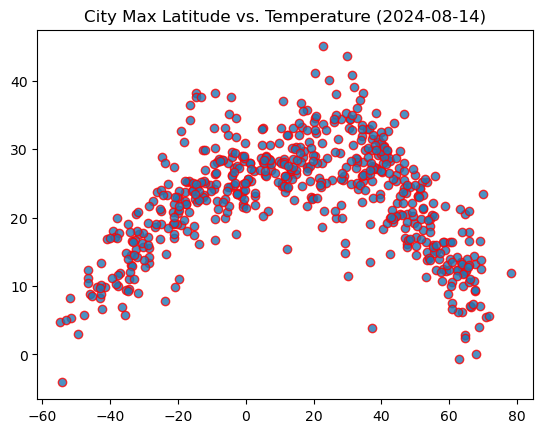

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"

)

# Incorporate the other graph properties
# YOUR CODE HERE- labels x label, y label etc... if you want to add grid etc..
date= time.strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [25]:
print(city_data_df.columns)


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


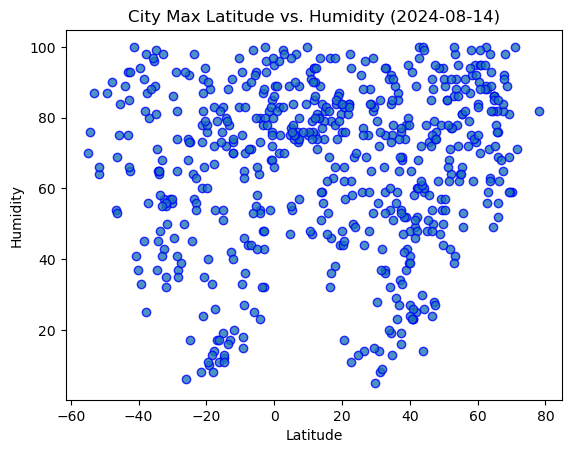

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="blue",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

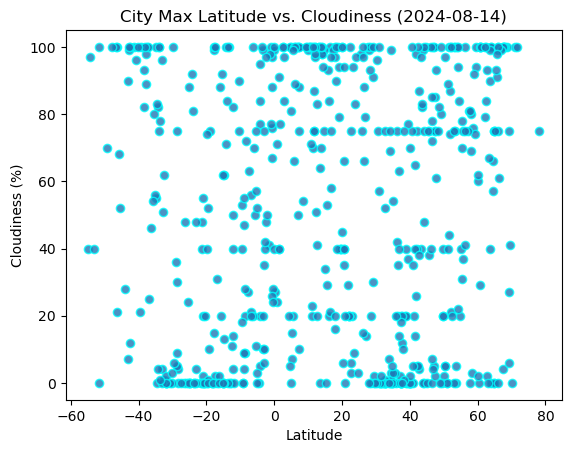

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="cyan",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
    
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

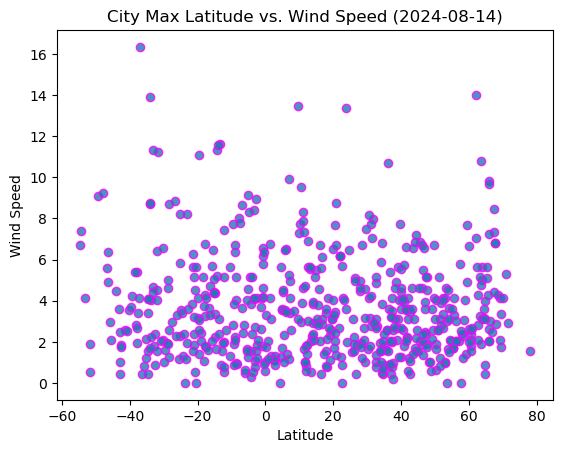

In [30]:
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="magenta",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
    
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [123]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r--")
    plt.annotate(line_eq, text_coord, fontsize=16, color="blue")
    plt.xlabel("Lat")
    plt.ylabel(title)

    print(f"The r-value is {rvalue ** 2}")
    plt.show()

# YOUR CODE HERE - y=mx+c x= and coordinates

In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pacific grove,36.6177,-121.9166,19.10,87,20,3.60,US,1723655585
4,hadibu,12.6500,54.0333,26.20,81,41,6.89,YE,1723655590
5,tura,25.5198,90.2201,25.52,92,98,1.49,IN,1723655591
6,stanley,54.8680,-1.6985,20.44,64,20,2.06,GB,1723655592
9,cold lake,54.4502,-110.2017,18.78,62,84,2.08,CA,1723655597


In [127]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.93,80,25,16.34,SH,1723655582
2,queenstown,-31.8976,26.8753,8.94,35,0,6.41,ZA,1723655587
3,adamstown,-25.0660,-130.1015,20.95,92,88,5.84,PN,1723655588
7,rio gallegos,-51.6226,-69.2181,5.38,64,100,1.91,AR,1723655594
8,port-aux-francais,-49.3500,70.2167,2.94,87,70,9.08,TF,1723655595


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.4250454104954606


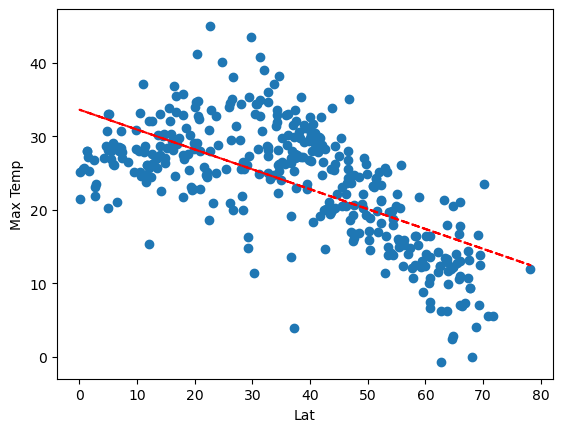

In [130]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE x= latitude y= temperature
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
#
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

plt.savefig("output_data/Fig5.png")

The r-value is 0.6270050269147437


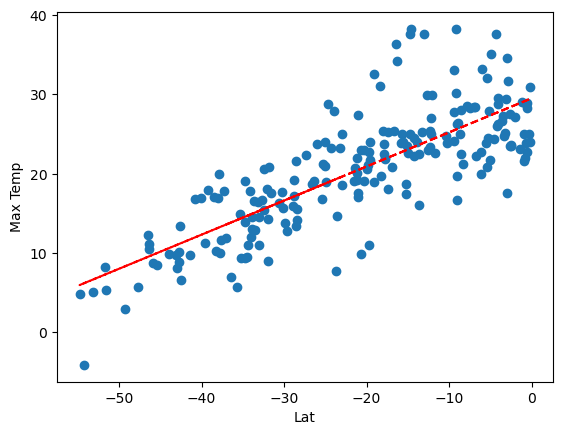

In [132]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE x= latitude y= temperature
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
#
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.00015404575813235185


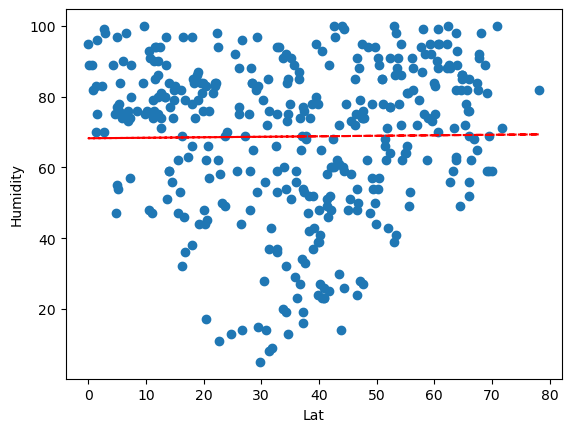

In [136]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
#
plot_linear_regression(x_values, y_values, "Humidity", (6, -10))

plt.savefig("output_data/Fig7.png")

The r-value is 0.005314919351121244


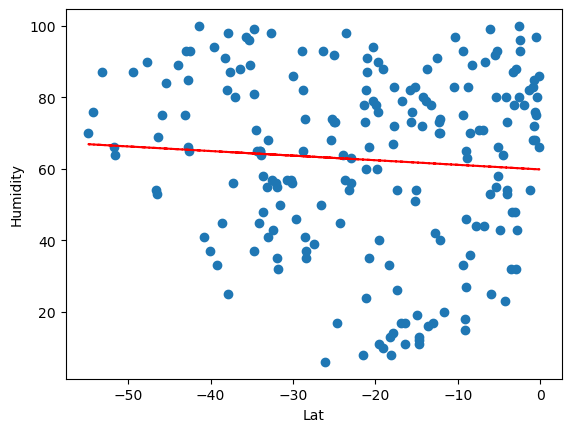

In [138]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
#
plot_linear_regression(x_values, y_values, "Humidity", (6, -10))

plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0013404533739225426


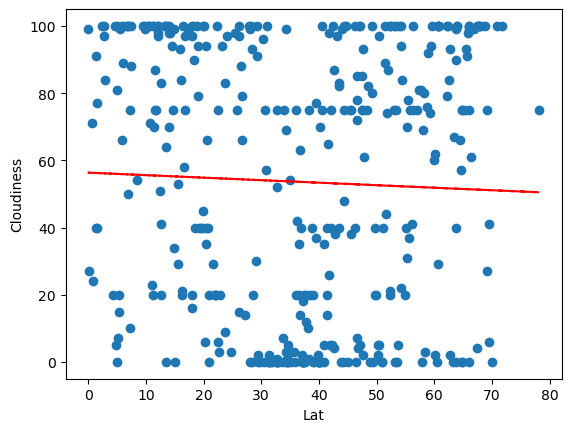

<Figure size 640x480 with 0 Axes>

In [153]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
#
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 20))

plt.savefig("output_data/Fig9.png")

The r-value is 0.014250361119231331


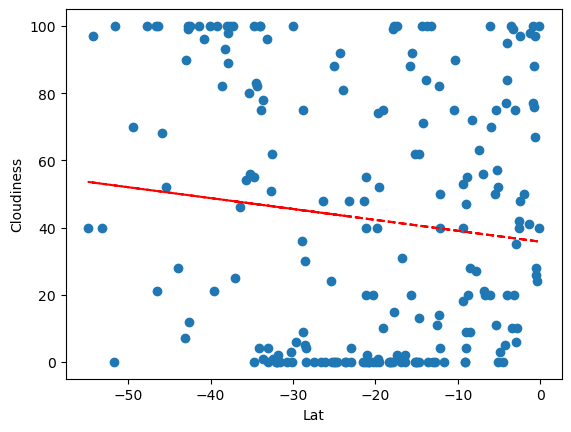

In [142]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
#
plot_linear_regression(x_values, y_values, "Cloudiness", (6, -10))

plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.00011495959593702074


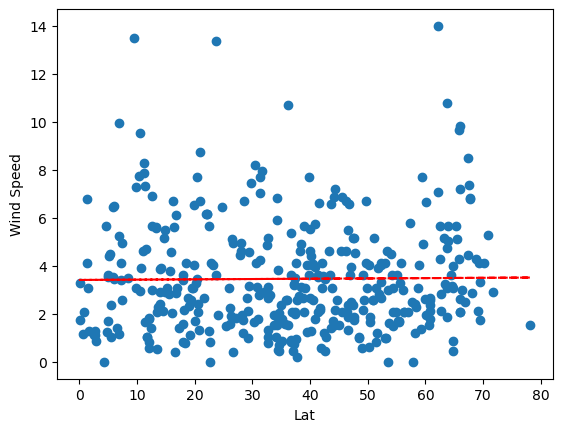

<Figure size 640x480 with 0 Axes>

In [156]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]
#
plot_linear_regression(x_values, y_values, "Wind Speed", (40, 20))

plt.savefig("output_data/Fig11.png")

The r-value is 0.004083842557761901


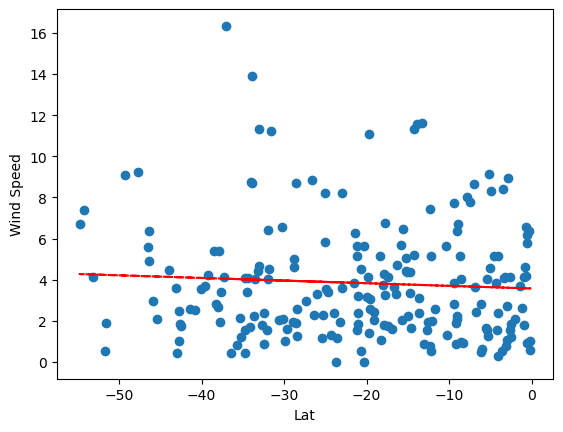

In [146]:
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
#
plot_linear_regression(x_values, y_values, "Wind Speed", (6, -10))

plt.savefig("output_data/Fig12.png")